In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'resume-dataset' dataset.
Path to dataset files: /kaggle/input/resume-dataset


In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/resume-dataset/Resume/Resume.csv")
print(df.head())
print(df['Category'].value_counts())


         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118


In [ ]:
import re, nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<[^>]+>', ' ', text)      # HTML tags
    text = re.sub(r'http\S+|www\.\S+', ' ', text)  # URLs
    text = re.sub(r'[^a-z\s]', ' ', text)     # only letters
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([w for w in text.split() if w not in STOPWORDS])
    return text

df['clean_text'] = df['Resume_str'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['Category'])
print(le.classes_)   # list of all 24 categories


['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'BANKING' 'BPO' 'BUSINESS-DEVELOPMENT' 'CHEF' 'CONSTRUCTION'
 'CONSULTANT' 'DESIGNER' 'DIGITAL-MEDIA' 'ENGINEERING' 'FINANCE' 'FITNESS'
 'HEALTHCARE' 'HR' 'INFORMATION-TECHNOLOGY' 'PUBLIC-RELATIONS' 'SALES'
 'TEACHER']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], stratify=df['label'],
    test_size=0.2, random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
Xtr = tfidf.fit_transform(X_train)
Xte = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(Xtr, y_train)
y_pred = clf.predict(Xte)

print(classification_report(y_test, y_pred, target_names=le.classes_))


                        precision    recall  f1-score   support

            ACCOUNTANT       0.65      0.83      0.73        24
              ADVOCATE       0.46      0.50      0.48        24
           AGRICULTURE       0.64      0.54      0.58        13
               APPAREL       0.71      0.26      0.38        19
                  ARTS       0.54      0.33      0.41        21
            AUTOMOBILE       0.40      0.57      0.47         7
              AVIATION       0.84      0.67      0.74        24
               BANKING       0.83      0.65      0.73        23
                   BPO       0.50      0.50      0.50         4
  BUSINESS-DEVELOPMENT       0.54      0.88      0.67        24
                  CHEF       0.86      0.75      0.80        24
          CONSTRUCTION       0.77      0.77      0.77        22
            CONSULTANT       0.50      0.17      0.26        23
              DESIGNER       0.84      0.76      0.80        21
         DIGITAL-MEDIA       0.73      

In [ ]:
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer("all-mpnet-base-v2")

Xtr_emb = embedder.encode(X_train.tolist(), show_progress_bar=True)
Xte_emb = embedder.encode(X_test.tolist(), show_progress_bar=True)

from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(hidden_layer_sizes=(512,128), max_iter=200, early_stopping=True)
clf2.fit(Xtr_emb, y_train)
y_pred2 = clf2.predict(Xte_emb)

print(classification_report(y_test, y_pred2, target_names=le.classes_))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = SentenceTransformer("all-mpnet-base-v2")

Xtr_emb = model.encode(X_train.tolist(), show_progress_bar=True)
Xte_emb = model.encode(X_test.tolist(), show_progress_bar=True)

clf = LogisticRegression(max_iter=2000, class_weight="balanced")
clf.fit(Xtr_emb, y_train)
y_pred = clf.predict(Xte_emb)

print(classification_report(y_test, y_pred, target_names=le.classes_))

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

                        precision    recall  f1-score   support

            ACCOUNTANT       0.72      0.88      0.79        24
              ADVOCATE       0.62      0.42      0.50        24
           AGRICULTURE       0.88      0.54      0.67        13
               APPAREL       0.45      0.26      0.33        19
                  ARTS       0.43      0.29      0.34        21
            AUTOMOBILE       0.50      0.43      0.46         7
              AVIATION       0.89      0.71      0.79        24
               BANKING       0.79      0.65      0.71        23
                   BPO       0.12      0.25      0.17         4
  BUSINESS-DEVELOPMENT       0.70      0.79      0.75        24
                  CHEF       0.91      0.83      0.87        24
          CONSTRUCTION       0.85      0.77      0.81        22
            CONSULTANT       0.69      0.48      0.56        23
              DESIGNER       0.78      0.86      0.82        21
         DIGITAL-MEDIA       0.67      

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

X_train_embeddings = model.encode(X_train.tolist(), show_progress_bar=True)
X_test_embeddings  = model.encode(X_test.tolist(), show_progress_bar=True)  # <-- add this

clf.fit(X_train_embeddings, y_train)
y_pred = clf.predict(X_test_embeddings)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.67      0.50      0.57        24
           2       0.75      0.69      0.72        13
           3       0.50      0.26      0.34        19
           4       0.57      0.19      0.29        21
           5       0.50      0.57      0.53         7
           6       0.81      0.71      0.76        24
           7       0.78      0.61      0.68        23
           8       0.29      0.50      0.36         4
           9       0.81      0.92      0.86        24
          10       0.91      0.83      0.87        24
          11       0.79      0.86      0.83        22
          12       0.83      0.87      0.85        23
          13       0.85      0.81      0.83        21
          14       0.62      0.68      0.65        19
          15       0.95      0.75      0.84        24
          16       0.87      0.83      0.85        24
          17       0.75    

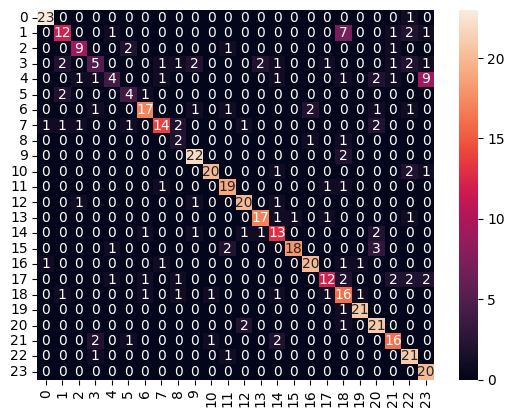

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test_embeddings)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.show()

In [ ]:
import joblib

joblib.dump(clf, "career_classifier.pkl")
model.save("sentence_transformer_model")

In [ ]:
from sentence_transformers import SentenceTransformer
import joblib

model = SentenceTransformer("sentence_transformer_model")
clf = joblib.load("career_classifier.pkl")

new_text = ["Skilled in accounting, taxation, and financial analysis."]
embedding = model.encode(new_text)
prediction = clf.predict(embedding)
print(prediction)

[0]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
import joblib

# Load dataset (same CSV used for training)
df = pd.read_csv("/kaggle/input/resume-dataset/Resume/Resume.csv")

# Recreate label encoder
le = LabelEncoder()
le.fit(df['Category'])  # fit on full category column

# Load trained models
model = SentenceTransformer("sentence_transformer_model")
clf = joblib.load("career_classifier.pkl")

# Predict a new resume text
new_text = ["Skilled in accounting, taxation, and financial analysis."]
embedding = model.encode(new_text)
prediction = clf.predict(embedding)

# Convert numeric label back to original category name
predicted_label = le.inverse_transform(prediction)
print(predicted_label[0])

ACCOUNTANT


In [ ]:
from sentence_transformers import SentenceTransformer
import joblib

# Load the saved model + classifier + label encoder
model = SentenceTransformer("sentence_transformer_model")
clf = joblib.load("career_classifier.pkl")
label_encoder = joblib.load("label_encoder.pkl")   # make sure you saved it earlier

# New text to predict
new_text = ["Skilled in accounting, taxation, and financial analysis."]

# Encode + predict
embedding = model.encode(new_text)
prediction = clf.predict(embedding)

# Convert back to category name
predicted_label = label_encoder.inverse_transform(prediction)
print(predicted_label[0])

FileNotFoundError: [Errno 2] No such file or directory: 'label_encoder.pkl'

In [ ]:
new_texts = [
    # Finance / Accounting
    "Experienced in bookkeeping, payroll management, and financial reporting.",
    "Managed corporate taxes and prepared annual financial statements.",

    # IT / Engineering
    "Proficient in Python, Java, and full-stack web development.",
    "Designed and implemented scalable cloud-based solutions using AWS.",

    # HR / Recruitment
    "Handled recruitment, employee onboarding, and performance management.",
    "Skilled in HR policies, employee engagement, and training programs.",

    # Marketing / Sales / Business Development
    "Developed marketing campaigns and digital advertising strategies.",
    "Achieved 150% of sales targets by expanding client base.",

    # Healthcare / Fitness
    "Certified nurse with experience in patient care and health monitoring.",
    "Personal trainer specializing in weight management and fitness programs.",

    # Teaching / Education
    "Taught high school mathematics and developed interactive lesson plans.",
    "Experienced in curriculum design and online tutoring for students.",

    # Creative / Design / Arts
    "Graphic designer skilled in Photoshop, Illustrator, and UI/UX design.",
    "Artist with experience in painting, sketching, and visual storytelling.",

    # Legal / Advocate
    "Practicing lawyer specializing in corporate law and litigation.",
    "Provided legal advice and drafted contracts for clients."
]


In [ ]:
embeddings = model.encode(new_texts)
predictions = clf.predict(embeddings)
predicted_labels = le.inverse_transform(predictions)

for text, label in zip(new_texts, predicted_labels):
    print(f"Text: {text[:60]}... \nPredicted Category: {label}\n")

Text: Experienced in bookkeeping, payroll management, and financia... 
Predicted Category: ACCOUNTANT

Text: Managed corporate taxes and prepared annual financial statem... 
Predicted Category: FINANCE

Text: Proficient in Python, Java, and full-stack web development.... 
Predicted Category: BPO

Text: Designed and implemented scalable cloud-based solutions usin... 
Predicted Category: INFORMATION-TECHNOLOGY

Text: Handled recruitment, employee onboarding, and performance ma... 
Predicted Category: AVIATION

Text: Skilled in HR policies, employee engagement, and training pr... 
Predicted Category: HR

Text: Developed marketing campaigns and digital advertising strate... 
Predicted Category: DIGITAL-MEDIA

Text: Achieved 150% of sales targets by expanding client base.... 
Predicted Category: DIGITAL-MEDIA

Text: Certified nurse with experience in patient care and health m... 
Predicted Category: CONSULTANT

Text: Personal trainer specializing in weight management and fitne... 
Predicted

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Encode test set into embeddings
X_test_embeddings = model.encode(X_test.tolist(), show_progress_bar=True)

# Step 2: Make predictions
y_pred = clf.predict(X_test_embeddings)

# Step 3: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Optional: Detailed metrics
print(classification_report(y_test, y_pred, target_names=le.classes_))

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Test Accuracy: 73.64%
                        precision    recall  f1-score   support

            ACCOUNTANT       0.92      0.96      0.94        24
              ADVOCATE       0.67      0.50      0.57        24
           AGRICULTURE       0.75      0.69      0.72        13
               APPAREL       0.50      0.26      0.34        19
                  ARTS       0.57      0.19      0.29        21
            AUTOMOBILE       0.50      0.57      0.53         7
              AVIATION       0.81      0.71      0.76        24
               BANKING       0.78      0.61      0.68        23
                   BPO       0.29      0.50      0.36         4
  BUSINESS-DEVELOPMENT       0.81      0.92      0.86        24
                  CHEF       0.91      0.83      0.87        24
          CONSTRUCTION       0.79      0.86      0.83        22
            CONSULTANT       0.83      0.87      0.85        23
              DESIGNER       0.85      0.81      0.83        21
         DIGITAL-

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the same CSV used for training
df = pd.read_csv("/kaggle/input/resume-dataset/Resume/Resume.csv")  # replace with your actual CSV path

# Recreate the encoder
le = LabelEncoder()
le.fit(df['Category'])  # Fit on the Category column

LabelEncoder()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("/kaggle/input/resume-dataset/Resume/Resume.csv")  # Replace with your path

# Fit LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])

# Create a mapping dataframe
mapping_df = pd.DataFrame({
    'numeric_label': range(len(le.classes_)),
    'category_name': le.classes_
})

# Save to CSV
mapping_df.to_csv("label_encoder_mapping.csv", index=False)
print("Label encoder mapping saved to label_encoder_mapping.csv")

Label encoder mapping saved to label_encoder_mapping.csv


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load sentence transformer
model = SentenceTransformer("all-MiniLM-L6-v2")

# Assume df is your DataFrame with 'Resume_str' and 'Category' columns
X_texts = df['Resume_str'].apply(clean_text).tolist()
y_labels = df['Category'].tolist()  # <- use strings directly

# Generate embeddings
X_embeddings = model.encode(X_texts, show_progress_bar=True)

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_embeddings, y_labels)

# Save model
joblib.dump(clf, "career_classifier_string_output.pkl")

Batches:   0%|          | 0/78 [00:00<?, ?it/s]

['career_classifier_string_output.pkl']

In [ ]:
import re
import pdfplumber
import nltk

nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

def extract_text_from_pdf(pdf_file):
    text = ""
    with pdfplumber.open(pdf_file) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<[^>]+>', ' ', text)
    text = re.sub(r'http\S+|www\.\S+', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([w for w in text.split() if w not in STOPWORDS])
    return text

import numpy as np

def classify_resume(pdf_file, model, clf):
    text = extract_text_from_pdf(pdf_file)
    clean_resume = clean_text(text)
    embedding = model.encode([clean_resume])

    prediction = clf.predict(embedding)  # returns string directly
    return prediction[0]  # return the string category

# Load trained model
clf = joblib.load("career_classifier_string_output.pkl")
model = SentenceTransformer("all-MiniLM-L6-v2")

# Test a PDF
predicted_category = classify_resume("/kaggle/input/resume-dataset/data/data/ADVOCATE/11174187.pdf", model, clf)
print("Predicted Resume Category:", predicted_category)

Predicted Resume Category: ADVOCATE
